## W3&W4 post studio exercises (errors, model fitting)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

***
We will use 

* [who-health-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/who-health-data.csv)

* [wisconsin-cancer-data.csv](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/kaggle-wisconsin-cancer.csv)

throughout the exercises. Download the datasets into the same directory as your post-studio notebook.

In [4]:
# Remember these? Our usual package imports for handling data.
import numpy as np
import pandas as pd
import seaborn as sns

# Specialised functions for calculating prediction error rates.
from sklearn.metrics import precision_score

In [79]:
who_data_2015 = (
    pd.read_csv("who-health-data.csv") # Read in the csv data.
    .rename(columns=lambda c: c.strip())      # Clean up column names.
    .query("Year == 2015")                    # Restrict the dataset to records from 2015.
    # Removes two columns which contain a lot of missing data...
    .drop(columns=["Alcohol", "Total expenditure"])
    # ... then drop any rows with missing values.
    .dropna()
)

wisconsin_cancer_biopsies = (
    pd.read_csv("kaggle-wisconsin-cancer.csv")
    # This tidies up the naming of results (M -> malignant, B -> benign)
    .assign(diagnosis=lambda df: df['diagnosis']  
        .map({"M": "malignant", "B": "benign"})
        .astype('category')
    )
)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
80,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,9,93.0,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,Uruguay,2015,Developing,77.0,116.0,0,0.000000,95.0,0,64.0,0,95.0,95.0,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5
2826,Uzbekistan,2015,Developing,69.4,184.0,15,0.000000,99.0,22,44.7,17,99.0,99.0,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1
2842,Vanuatu,2015,Developing,72.0,13.0,0,0.000000,64.0,39,53.3,0,65.0,64.0,0.1,285.834140,26463.0,1.5,1.4,0.598,10.8
2906,Zambia,2015,Developing,61.8,33.0,27,0.000000,9.0,9,23.4,40,9.0,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


### Exercise 1

Given the dataframe `ex1_who_with_predictions` below, compute the Mean Absolute Error for the predicted values of life expectancy. You can repeat the process previously shown, or find a function in `sklearn.metrics` to compute this for you.

In [7]:
ex1_who_with_predictions = (
    who_data_2015[["Schooling", "Life expectancy"]]
    .assign(Predicted=lambda df: df["Schooling"] * 2.3 + 43)
    .dropna()
)
ex1_who_with_predictions.head()

,Schooling,Life expectancy,Predicted
0,10.1,65.0,66.23
16,14.2,77.8,75.66
32,14.4,75.6,76.12
48,11.4,52.4,69.22
80,17.3,76.3,82.79


In [11]:
#calculating the Mean Absolute Error for the predicted values of life expectancy

errors = ex1_who_with_predictions['Life expectancy'] - ex1_who_with_predictions['Predicted']
mae_score = errors.abs().mean()
print(f"Mean absolute error is {mae_score:.1f} years")



Mean absolute error is 3.8 years


### Exercise 2

Given the classification predictions and actual results in the dataframe `ex2_biopsies_with_predictions` below, compute accuracy, precision and recall. Also find the number of false negatives.

In [62]:
import pandas as pd


ex2_biopsies_with_predictions = (
    wisconsin_cancer_biopsies
    .assign(prediction=lambda df: df['texture_mean'].lt(20)
        .map({True: "benign", False: "malignant"})
    )
    [['radius_mean', 'texture_mean', 'diagnosis', 'prediction']]
)
ex2_biopsies_with_predictions



threshold = 20

# Classify predictions based on the threshold
ex2_biopsies_with_predictions['classified_prediction'] = ex2_biopsies_with_predictions['texture_mean'].apply(lambda x: 'malignant' if x > threshold else 'benign')

# Define True Positives, True Negatives, False Positives, and False Negatives
TP = ex2_biopsies_with_predictions[(ex2_biopsies_with_predictions['classified_prediction'] == 'malignant') & (ex2_biopsies_with_predictions['diagnosis'] == 'malignant')].shape[0]
TN = ex2_biopsies_with_predictions[(ex2_biopsies_with_predictions['classified_prediction'] == 'benign') & (ex2_biopsies_with_predictions['diagnosis'] == 'benign')].shape[0]
FP = ex2_biopsies_with_predictions[(ex2_biopsies_with_predictions['classified_prediction'] == 'malignant') & (ex2_biopsies_with_predictions['diagnosis'] == 'benign')].shape[0]
FN = ex2_biopsies_with_predictions[(ex2_biopsies_with_predictions['classified_prediction'] == 'benign') & (ex2_biopsies_with_predictions['diagnosis'] == 'malignant')].shape[0]

print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")




True Positives (TP): 142
True Negatives (TN): 274
False Positives (FP): 83
False Negatives (FN): 70


In [64]:
TOTAL = TP + TN + FP + FN

print(f"Accuracy = {(TP + TN) / TOTAL = :.3f}")
print(f"Precision = {TP / (TP + FP) = :.3f}")
print(f"Recall = {TP / (TP + FN) = :.3f}")

Accuracy = (TP + TN) / TOTAL = 0.731
Precision = TP / (TP + FP) = 0.631
Recall = TP / (TP + FN) = 0.670


### Exercise 3

Consider three different predictors for the cancer biopsy screening dataset:

* Predictor A has an accuracy of 0.95, and recall of 0.99
* Predictor B has an accuracy of 0.99, and recall of 0.95
* Predictor C has an accuracy of 0.5, and a recall of 1.0

The test required to collect data from a new patient (on which the predictor will give a predicted diagnosis) is minimally invasive. If the predictor predicts a positive (malignant) diagnosis, the patient will be referred for further screening which can be expensive.

Considering the context, which predictive model (A, B, or C) would likely be preferred for this task? Write your answer in a markdown cell below, and give a brief explanation of your reasoning.

-------------------------------------------------------------------------
<mark> Predictor B </mark>

In this scenario, where the test to collect data is minimally invasive but further screening for a positive diagnosis is expensive, the choice of the predictive model involves balancing accuracy and recall.

Predictor B** has the highest accuracy (0.99) and a slightly lower recall (0.95). It performs very well overall and balances between detecting positives and avoiding false positives.


-------------------------------------------------------------------------

### Exercise 4

Choose one different input/feature variable (other than Schooling) and fit a linear regression model to predict Life Expectancy using sklearn. Can you achieve a better error rate than what we found in pre-studio notebook? (RMSE and MAE for Schooling were 4.71 and 3.69, respectively.) Suggest a method to narrow down your choices of variables to use in order to arrive at a good model. 

Hint 1: Correlation.

Hint 2: You can use the functions written in the pre-studio notebook, e.g. prediction_root_mean_squared_error(gradient, intercept), to calculate the model error once you choose your model parameters (features).

----------------------------------------------------------------------------------------------
<mark>Answer</mark>


we can choose better RMSE AND MSE by having  <mark> "Income composition of resources" </mark> as our y intercept  <mark>(code has been provided below to show the working)</mark>

I think that gradient decent method would be better to nerrow down would be better at the data set is really large and also no direct mathematical expression given to directly computr the model parameterers.

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,71.279624,65.0,1154,19.1,83,6.0,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
16,Albania,2015,Developing,77.8,74.0,0,364.975229,99.0,0,58.0,0,99.0,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
32,Algeria,2015,Developing,75.6,19.0,21,0.000000,95.0,63,59.5,24,95.0,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,0.000000,64.0,118,23.3,98,7.0,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
80,Argentina,2015,Developing,76.3,116.0,8,0.000000,94.0,0,62.8,9,93.0,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,Uruguay,2015,Developing,77.0,116.0,0,0.000000,95.0,0,64.0,0,95.0,95.0,0.1,15524.842470,3431552.0,1.5,1.4,0.794,15.5
2826,Uzbekistan,2015,Developing,69.4,184.0,15,0.000000,99.0,22,44.7,17,99.0,99.0,0.1,2137.576852,312989.0,3.0,3.1,0.697,12.1
2842,Vanuatu,2015,Developing,72.0,13.0,0,0.000000,64.0,39,53.3,0,65.0,64.0,0.1,285.834140,26463.0,1.5,1.4,0.598,10.8
2906,Zambia,2015,Developing,61.8,33.0,27,0.000000,9.0,9,23.4,40,9.0,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


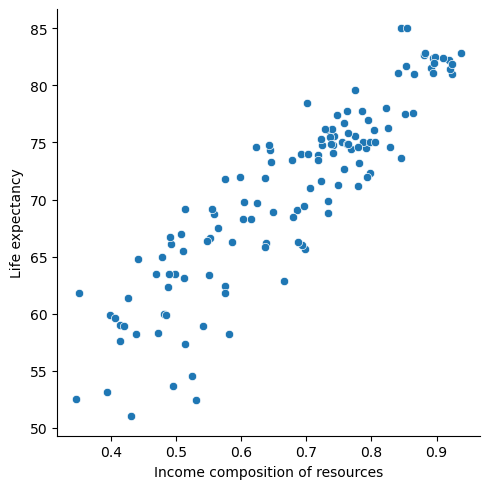

In [136]:

#Using BMI instead of schoolinG

sns.relplot(data=who_data_2015, x="Income composition of resources", y="Life expectancy");

who_data_2015
#choose better error rate that found in pre reading material.


#uggest a method to narrow down your choices of variables to use in order to arrive at a good model.




In [138]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def prediction_root_mean_squared_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Income composition of resources"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    # Note that `squared=False` gives us RMSE. Then we're in the same units as MAE.
    return mean_squared_error(y_true=actual, y_pred=predictions, squared=False)

def prediction_mean_absolute_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Income composition of resources"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_absolute_error(y_true=actual, y_pred=predictions)

# Compute error values for different gradient and intercepts.
# This will be used to build the colour contour plots.
gradient_values, intercept_values = np.meshgrid(
    np.linspace(0.5, 5.0, 30),
    np.linspace(30, 80, 30),
)
rmse_errors = np.zeros(gradient_values.shape)
for i in range(rmse_errors.shape[0]):
    for j in range(rmse_errors.shape[1]):
        rmse_errors[i, j] = prediction_root_mean_squared_error(gradient_values[i, j], intercept_values[i, j])
mae_errors = np.zeros(gradient_values.shape)
for i in range(mae_errors.shape[0]):
    for j in range(mae_errors.shape[1]):
        mae_errors[i, j] = prediction_mean_absolute_error(gradient_values[i, j], intercept_values[i, j])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

In [150]:
from scipy.optimize import minimize

# This sets initial guess values (gradient = 3, intercept = 60) for the algorithm to
# use as a starting point. You can change these and re-run the cell to observe the
# different paths taken by the algorithm.
initial_guess = (3, 60)

# We'll record the different model parameters tested in these lists.
gradient_steps = [initial_guess[0]]
intercept_steps = [initial_guess[1]]

def callback(values, *args, **kwargs):
    """ This function is called by `minimize` whenever it takes a step. This allows the
    steps to be recorded """
    gradient_steps.append(values[0])
    intercept_steps.append(values[1])

def prediction_error(coefficients):
    """ This function is called with both coefficients (gradient and intercept) as a tuple.
    It returns the result of the error calculation which scipy.optimise will use """
    gradient, intercept = coefficients
    return prediction_root_mean_squared_error(gradient, intercept)

# Run the gradient descent algorithm and extract the optimal model parameter values.
opt_result = minimize(
    prediction_error,      # error evaluation function
    initial_guess,         # an initial guess of the model parameters
    callback=callback,     # a function to record trial points
)

# This gives some status information and the model parameter results.
opt_result


optimal_gradient, optimal_intercept = opt_result.x
print("Model is y = {:.2f}x + {:.2f}".format(optimal_gradient, optimal_intercept))
print("RMSE = {:.2f}".format(prediction_root_mean_squared_error(optimal_gradient, optimal_intercept)))
print("MAE = {:.2f}".format(prediction_mean_absolute_error(optimal_gradient, optimal_intercept)))


Model is y = 47.50x + 38.69
RMSE = 3.50
MAE = 2.74


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5*

The function `model_correct_predictions` below returns the number of correct predictions made by a predictive model for the cancer biopsy dataset, for a given parameter value. This parameter value simply controls the threshold value for radius above which a sample is predicted as malignant.

Try different values of the parameter in this model within the range [0, 30]. Record and plot the resulting accuracy values against the parameter value (similar to the regression cost function example above).

What value of the parameter provides the best error rate? Explain how can you be confident you have found the best result here.

In [4]:
def model_correct_predictions(radius_split_parameter):
    """ Return the number of correct predictions made by the model
    for the given parameter value. """
    data = wisconsin_cancer_biopsies.assign(
        predicted=lambda df: df['radius_mean'].lt(radius_split_parameter)
            .map({True: "benign", False: "malignant"})
    )
    return (data['diagnosis'] == data['predicted']).sum()

model_correct_predictions(12)

369

### Exercise 6*

In examples in pre-studio notebook (W4) we have used root mean squared error (the standard cost function for linear regression) to fit the model parameters. Try re-running the `scipy.optimise` method using mean absolute error. Are the resulting model parameters the same as above? Give some brief reasoning why there might be a difference here.

In [5]:
# Hint: you only need to make one small change in the prediction_error function to do this.

In [6]:
def prediction_root_mean_squared_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    # Note that `squared=False` gives us RMSE. Then we're in the same units as MAE.
    return mean_squared_error(y_true=actual, y_pred=predictions, squared=False)

def prediction_mean_absolute_error(gradient, intercept):
    """ Return the prediction error associated with the value of the parameters.
    This time around, let's use sklearn.metrics. """
    predictions = who_data_2015["Schooling"] * gradient + intercept
    actual = who_data_2015["Life expectancy"]
    return mean_absolute_error(y_true=actual, y_pred=predictions)

### Exercise 7*

We can see above that different methods for determining model parameters arrive at the same result, but what happens if we change the dataset slightly. Experiment by taking several (at least 10) different samples of the data, fitting a linear model for each one, and plotting a histogram of the different gradient and intercept coefficients you find. Is there a significant amount of variation in the parameter values?

In [7]:
sample_data = who_data_2015.sample(30)  # selects a small sample of 30 random rows from the data.